# Project: Wrangle and Analyze Data

## Table of Contents

<ul>
<li><b>1. <a href="# 1. DATA WRANGLING">DATA WRANGLING</a></b></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <br>
    
<li><b>2. <a href="#storing">DATA STORING</a></b></li>
    <br>
    
<li><b>3. <a href="# 3. DATA ANALYSIS AND VISUALIZATION">DATA ANALYSIS AND VISUALIZATION</a></b></li>
    <br>
    
<li><b>4. <a href="#reporting">DATA REPORTING</a></b></li>
</ul>


# 1. DATA WRANGLING

## DATA GATHERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json
import re
from datetime import datetime
from functools import reduce
from IPython.display import Image
plt.style.use('seaborn')

%matplotlib inline

In [3]:
#Loading Dataset 1 of 3 into a dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#Loading Dataset 2 of 3 into a dataframe

image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Loading Dataset 3 of 3: Tweeter API

CONSUMER_KEY = "HIDDEN"
CONSUMER_SECRET = "HIDDEN"
ACCESS_TOKEN = "HIDDEN"
ACCESS_TOKEN_SECRET = "HIDDEN"

#OAuthHandler codes

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
#Using Twitter API to collect status data on Tweets Archive
tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in twitter_archive_df['tweet_id']:
    try:
        data = api.get_status(tweet_id,
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except Exception as e:
        tweet_id_missing.append(tweet_id)
        print(f'{tweet_id}: {e}')

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

888202515573088257: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

877611172832227328: 403 Forbidden
179 - Sorry, you are not authorized to see this status.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


877201837425926144: 503 Service Unavailable
130 - Over capacity


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

873697596434513921: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872668790621863937: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872261713294495745: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

869988702071779329: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

866816280283807744: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

861769973181624320: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

856602993587888130: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


856330835276025856: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

851953902622658560: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


851861385021730816: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

845459076796616705: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


844704788403113984: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842892208864923648: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

837366284874571778: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


837012587749474308: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

829374341691346946: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

827228250799742977: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

819588359383371776: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

812747805718642688: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

802247111496568832: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

779123168116150273: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

775096608509886464: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

771004394259247104: 403 Forbidden
179 - Sorry, you are not authorized to see this status.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


770743923962707968: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

766864461642756096: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

759923798737051648: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


759566828574212096: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

754011816964026368: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

711363825979756544: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

680055455951884288: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

In [8]:
# Writing Tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [9]:
# Loading the Twitter API
api_data = pd.read_json('tweet_json.txt')
api_data['tweet_id'] = api_data['id']
api_data = api_data[['tweet_id', 'favorite_count', 'retweet_count']]

In [10]:
api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33630,6953
1,892177421306343426,29166,5257
2,891815181378084864,21944,3462
3,891689557279858688,36711,7171
4,891327558926688256,35106,7703


## DATA ASSESSING

### Assessment of Twitter Archive

After collecting all of the following data, visually and programmatically review it for quality and tidiness concerns. At least eight (8) quality concerns and two (2) tidiness issues must be identified and documented.

In [11]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Data Types
1. Integer: tweet_id, rating_numerator, rating_denominator.
2. Float: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id.
3. Object: timestamp, source, text, retweeted_status_timestamp, expanded_urls and so on.

In [12]:
#Checking for duplicates
sum(twitter_archive_df['tweet_id'].duplicated())

0

No duplicate datapoint exists.

### NAME

In [13]:
# Checking NAMES with length less than 3 or none
twitter_archive_df[twitter_archive_df['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 3)]['name']

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 824, dtype: object

Some NAMES has values that are 'None' (string) instead of NaN and some have unusual names with less than 3 characters like 'a'

### RATINGS

In [14]:
print(twitter_archive_df['rating_denominator'].describe())
print('-'*40)
print(twitter_archive_df['rating_denominator'].value_counts())

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64
----------------------------------------
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


In [15]:
#Printing of 'rating_denominator' first tweet
denominator = twitter_archive_df['rating_denominator'].value_counts()
for c, i in enumerate(denominator.index):
    print(f"{c}: {twitter_archive_df.loc[twitter_archive_df['rating_denominator'] == i, 'text'].values[0]}")

0: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
2: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
3: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4: Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
5: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
6: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
7: @docmisterio account started on 11/15/15
8: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
9: Say hello to this unbelievably well beh

1. Some of the ratings are wrongly (example: for 10th rating, it should be 13/10 not 960/00.
2. Some tweets are not rated at all, like the 6th rating.
3. Tweets starting from RT are retweets.

In [16]:
print(twitter_archive_df['rating_numerator'].describe())
print('-'*40)
print(twitter_archive_df['rating_numerator'].value_counts())

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64
----------------------------------------
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64


In [17]:
#Printing of 'rating_denominator' first tweet
numerator = twitter_archive_df['rating_numerator'].value_counts()
for c, i in enumerate(numerator.index):
    print(f"{c}: {twitter_archive_df.loc[twitter_archive_df['rating_numerator'] == i, 'text'].values[0]}")

0: This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
1: Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
2: @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
3: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
4: RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
5: RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
6: I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
7: This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1

1. Some of the ratings contain decimal, which is unnecessary e.g. 8th one.
2. Some tweets doesn't contain dog pictures e.g. 16th, 22nd, 37th.

### RETWEETS

In [18]:
#Looking at the main tweets without retweets
twitter_archive_df[twitter_archive_df['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [19]:
# obtaining the number of rows
print("number of rows: ", twitter_archive_df.shape[0])
 
# obtaining the number of columns
print("number of columns: ", twitter_archive_df.shape[1])

number of rows:  2356
number of columns:  17


### Assessing the Image Prediction

In [20]:
image_prediction_df.head(21)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True


In [21]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Checking for missing rows
len(twitter_archive_df) - len(image_prediction_df)

281

In [23]:
# Checking for duplicates
sum(image_prediction_df['jpg_url'].duplicated())

66

### Assessing the Twitter API Dataset

In [24]:
api_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33630,6953
1,892177421306343426,29166,5257
2,891815181378084864,21944,3462
3,891689557279858688,36711,7171
4,891327558926688256,35106,7703


In [25]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2323 non-null   int64
 1   favorite_count  2323 non-null   int64
 2   retweet_count   2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [26]:
# Checking for missing rows
len(twitter_archive_df) - len(api_data)

33

In [27]:
# Checking for duplicates
sum(api_data['tweet_id'].duplicated())

0


### Data Quality Issues
#### Assessment of Twitter Archive

<li>Archive data have many retweets.</li>
<li>Name has values that are string 'None' instead of 'NaN'.</li>
<li>Some columns have underscore that needs to be eliminated and have its contents changed to CAPS LOCK.</li>
<li>Sorting the dataframe columns issues.</li>
<li>Some of the ratings are wrongly mentioned e.g. in one case, the rating should've been 13/10, not 960/00, while some tweets are not about dogs, so doesn't contain rating (tweets not containing dog images can be discarded), and some of the ratings contain decimal in the numerator.</li>
<li>Some column sources are showing links rather than direct sources like Tweet for iPhone.</li>
<li>There are columns that are not essential in the dataset.</li>


#### Assessing the Image Prediction

<li>There are some missing rows in images dataset (2075 rows instead of 2356): either the rows are missing or some tweets didn't have dog images.</li>
<li>There are duplicates of jpg_urls.</li>
<li>p1, p2, and p3 contains _ instead of spaces in their string.</li>

#### Assessing the Twitter API Dataset

<li>There are some missing tweets compared to the dataset in archive.</li>


### Data Tidiness Issues

<li>Create a new categorical column called stage to include the dog stages and delete the old 4 columns</li>
<li>Four dog stage columns should be combined into a single column</li><li>The different dataframes supposed to be merged.</li>
<li>All the retweets needs to be dropped.</li>

## DATA CLEANING

Instruction for Data Cleaning: 
> Clean each of the concerns you identified when examining. The end output should be a high-quality and well-organized master pandas DataFrame (or DataFrames, if appropriate). The issues that fulfill the Project Motivation must be cleared once again. Data storage, analysis, and visualization for this project

> Keep the clean DataFrame(s) in a CSV file, the primary one being entitled twitter archive master.csv. If extra files are necessary for tidiness because several tables are required, name these files properly. You may also save the cleaned data in a SQLite database (which is to be submitted as well if you do).

### Tidiness Issues

<b>Define Tidiness Issue #1</b>: Create a new categorical column called stage to include the dog stages and delete the old 4 columns

<b>Code:</b>

In [28]:
# Consolidate data
twitter_archive_df['dog_style'] = twitter_archive_df.doggo.fillna(twitter_archive_df.floofer.fillna(twitter_archive_df.pupper.fillna(twitter_archive_df.puppo)))

# Test values assignment
twitter_archive_df[['dog_style', 'doggo', 'floofer', 'pupper', 'puppo']].T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
dog_style,None,None,None,None,None,None,None,None,None,doggo,...,None,None,None,None,None,None,None,None,None,None
doggo,None,None,None,None,None,None,None,None,None,doggo,...,None,None,None,None,None,None,None,None,None,None
floofer,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
pupper,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
puppo,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<b>Testing:</b>

In [29]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<b>Define Tidiness Issue #2</b>: Four dog stage columns should be combined into a single column

<b>Code:</b>

In [30]:
# First replace None in stage columns with empty string as follows.
twitter_archive_df.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
twitter_archive_df['stage'] = twitter_archive_df.doggo + twitter_archive_df.floofer + twitter_archive_df.pupper + twitter_archive_df.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

twitter_archive_df.loc[twitter_archive_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive_df.loc[twitter_archive_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive_df.loc[twitter_archive_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

<b>Testing:</b>

In [31]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<b>Define Tidiness Issue #3</b>: Merging all the dataframes together

<b>Code:</b>

In [32]:
# merge the dataframes
dfs = [twitter_archive_df, image_prediction_df, api_data]
twitter_merged = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
# Tweets with no dog image will be dropped here

<b>Testing:</b>

In [33]:
# Testing the change resulting from the merging
twitter_merged.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33630,6953
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29166,5257
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21944,3462
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36711,7171
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35106,7703
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,17717,2578
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,10310,1644
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56557,15

<b>Define Tidiness Issue #4</b>: Dropping all retweets from the dataset

<b>Code:</b>

In [34]:
# Dropping the retweets
twitter_merged = twitter_merged[pd.isnull(twitter_merged.retweeted_status_id)]

<b>Testing:</b>

In [35]:
twitter_merged.shape

(1983, 32)

### Quality Issues

<b>Define Quality Issue #1</b>: Dropping these columns: retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, timestam, text, in_reply_to_status_id, in_reply_to_user_id

<b>Code:</b>

In [36]:
# Dropping the above listed columns
col_drop = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id']
twitter_merged = twitter_merged.drop(col_drop, 1)

<ipython-input-36-9935baa96627>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_merged = twitter_merged.drop(col_drop, 1)


<b>Testing:</b>

In [37]:
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   int64  
 1   source              1983 non-null   object 
 2   expanded_urls       1983 non-null   object 
 3   rating_numerator    1983 non-null   int64  
 4   rating_denominator  1983 non-null   int64  
 5   name                1983 non-null   object 
 6   doggo               1983 non-null   object 
 7   floofer             1983 non-null   object 
 8   pupper              1983 non-null   object 
 9   puppo               1983 non-null   object 
 10  dog_style           1983 non-null   object 
 11  stage               1983 non-null   object 
 12  jpg_url             1983 non-null   object 
 13  img_num             1983 non-null   int64  
 14  p1                  1983 non-null   object 
 15  p1_conf             1983 non-null   float64
 16  p1_dog

<b>Define Quality Issue #2</b>: Eliminating the underscore in columns and changing its contents to CAPS LOCK

In [38]:
# View the columns before the change
twitter_merged[['p1','p2','p3']].head(11)

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
...,...,...,...
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua


<b>Code:</b>

In [39]:
# Replace underscore with space
twitter_merged['p1'] = twitter_merged.p1.str.replace('_',' ')
twitter_merged['p2'] = twitter_merged.p2.str.replace('_',' ')
twitter_merged['p3'] = twitter_merged.p3.str.replace('_',' ')

# Capitalize the content (every word) using title
twitter_merged['p1'] = twitter_merged.p1.str.title()
twitter_merged['p2'] = twitter_merged.p2.str.title()
twitter_merged['p3'] = twitter_merged.p3.str.title()

<b>Testing:</b>

In [40]:
twitter_merged[['p1','p2','p3']].head(11)

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
...,...,...,...
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


<b>Define Quality Issue #3</b>: Change the value 'None' in the column name to 'NaN'

<b>Code:</b>

In [41]:
twitter_merged['name'] = twitter_merged['name'].replace('None', np.NaN)

<b>Testing:</b>

In [42]:
pd.isnull(twitter_merged.name).sum()

544

<b>Define Quality Issue #4</b>: Create a new column called rate_ratio which = rating_numerator / rating_denominator.

<b>Code:</b>

In [43]:
twitter_merged['rating_numerator'] = twitter_merged['rating_numerator'].astype('float')
twitter_merged['rating_denominator'] = twitter_merged['rating_denominator'].astype('float')

# Create the rate_ration column
twitter_merged['rate_ratio'] = twitter_merged['rating_numerator']/twitter_merged['rating_denominator']

<b>Testing:</b>

In [44]:
twitter_merged[['rating_numerator','rating_denominator','rate_ratio']].head(11)

,rating_numerator,rating_denominator,rate_ratio
0,13.0,10.0,1.3
1,13.0,10.0,1.3
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,12.0,10.0,1.2
...,...,...,...
6,13.0,10.0,1.3
7,13.0,10.0,1.3
8,13.0,10.0,1.3
9,14.0,10.0,1.4


<b>Define Quality Issue #5</b>: Sorting the dataframe columns

<b>Code:</b>

In [45]:
column_sort = ['tweet_id','name','rate_ratio','retweet_count', 'favorite_count',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','expanded_urls', 'jpg_url']

twitter_merged = twitter_merged[column_sort]

<b>Testing:</b>

In [46]:
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   int64  
 1   name                1439 non-null   object 
 2   rate_ratio          1983 non-null   float64
 3   retweet_count       1983 non-null   int64  
 4   favorite_count      1983 non-null   int64  
 5   source              1983 non-null   object 
 6   rating_numerator    1983 non-null   float64
 7   rating_denominator  1983 non-null   float64
 8   img_num             1983 non-null   int64  
 9   p1                  1983 non-null   object 
 10  p1_conf             1983 non-null   float64
 11  p1_dog              1983 non-null   bool   
 12  p2                  1983 non-null   object 
 13  p2_conf             1983 non-null   float64
 14  p2_dog              1983 non-null   bool   
 15  p3                  1983 non-null   object 
 16  p3_con

<b>Define Quality Issue #6</b>: Parsing column's source to show the direct source (example: Tweet for iPhone) rather than the full link.

<b>Code:</b>

In [47]:
# Displaying source column values
twitter_merged.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1945
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [48]:
# Extracting the string between the tags: <>
twitter_merged['source'] = twitter_merged.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

In [49]:
# Changing the source to category
twitter_merged['source'] = twitter_merged['source'].astype('category')

<b>Testing:</b>

In [50]:
twitter_merged.source.value_counts()

Twitter for iPhone    1945
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

<b>Define Quality Issue #7</b>: Converting the tweet_id from int to string.

<b>Code:</b>

In [51]:
twitter_merged['tweet_id'] = twitter_merged['tweet_id'].astype('str')

<b>Testing:</b>

In [52]:
twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2052
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1983 non-null   object  
 1   name                1439 non-null   object  
 2   rate_ratio          1983 non-null   float64 
 3   retweet_count       1983 non-null   int64   
 4   favorite_count      1983 non-null   int64   
 5   source              1983 non-null   category
 6   rating_numerator    1983 non-null   float64 
 7   rating_denominator  1983 non-null   float64 
 8   img_num             1983 non-null   int64   
 9   p1                  1983 non-null   object  
 10  p1_conf             1983 non-null   float64 
 11  p1_dog              1983 non-null   bool    
 12  p2                  1983 non-null   object  
 13  p2_conf             1983 non-null   float64 
 14  p2_dog              1983 non-null   bool    
 15  p3                  1983 non-null   ob

# 2. DATA STORING

In [53]:
twitter_merged.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# 3. DATA ANALYSIS AND VISUALIZATION

In [54]:
df = pd.read_csv('./twitter_archive_master.csv')
df.head(10)

,tweet_id,name,rate_ratio,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,Phineas,1.3,6953,33630,Twitter for iPhone,13.0,10.0,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,Tilly,1.3,5257,29166,Twitter for iPhone,13.0,10.0,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,Archie,1.2,3462,21944,Twitter for iPhone,12.0,10.0,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,Darla,1.3,7171,36711,Twitter for iPhone,13.0,10.0,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,Franklin,1.2,7703,35106,Twitter for iPhone,12.0,10.0,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,NaN,1.3,2578,17717,Twitter for iPhone,13.0,10.0,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6,890971913173991426,Jax,1.3,1644,10310,Twitter for iPhone,13.0,10.0,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7,890729181411237888,NaN,1.3,15655,56557,Twitter for iPhone,13.0,10.0,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,Zoey,1.3,3598,24374,Twitter for iPhone,13.0,10.0,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,https://twitter.com/dog_rates/status/890609185150312448/photo/1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,Cassie,1.4,6051,27803,Twitter for iPhone,14.0,10.0,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


In [55]:
df.describe()

,tweet_id,rate_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.983000e+03,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03
mean,7.355126e+17,1.169079,2226.696420,7658.194655,12.282400,10.535048,1.203732,0.593226,1.344738e-01,6.038860e-02
std,6.735416e+16,4.078332,3991.498942,11308.587162,41.612623,7.340889,0.561861,0.272036,1.006303e-01,5.091504e-02
min,6.660209e+17,0.000000,11.000000,66.000000,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758097e+17,1.000000,491.500000,1625.000000,10.000000,10.000000,1.000000,0.361530,5.397835e-02,1.631530e-02
50%,7.081309e+17,1.100000,1070.000000,3433.000000,11.000000,10.000000,1.000000,0.587342,1.175660e-01,4.953060e-02
75%,7.871428e+17,1.200000,2535.500000,9493.500000,12.000000,10.000000,1.000000,0.844583,1.950575e-01,9.164355e-02
max,8.924206e+17,177.600000,70117.000000,143881.000000,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


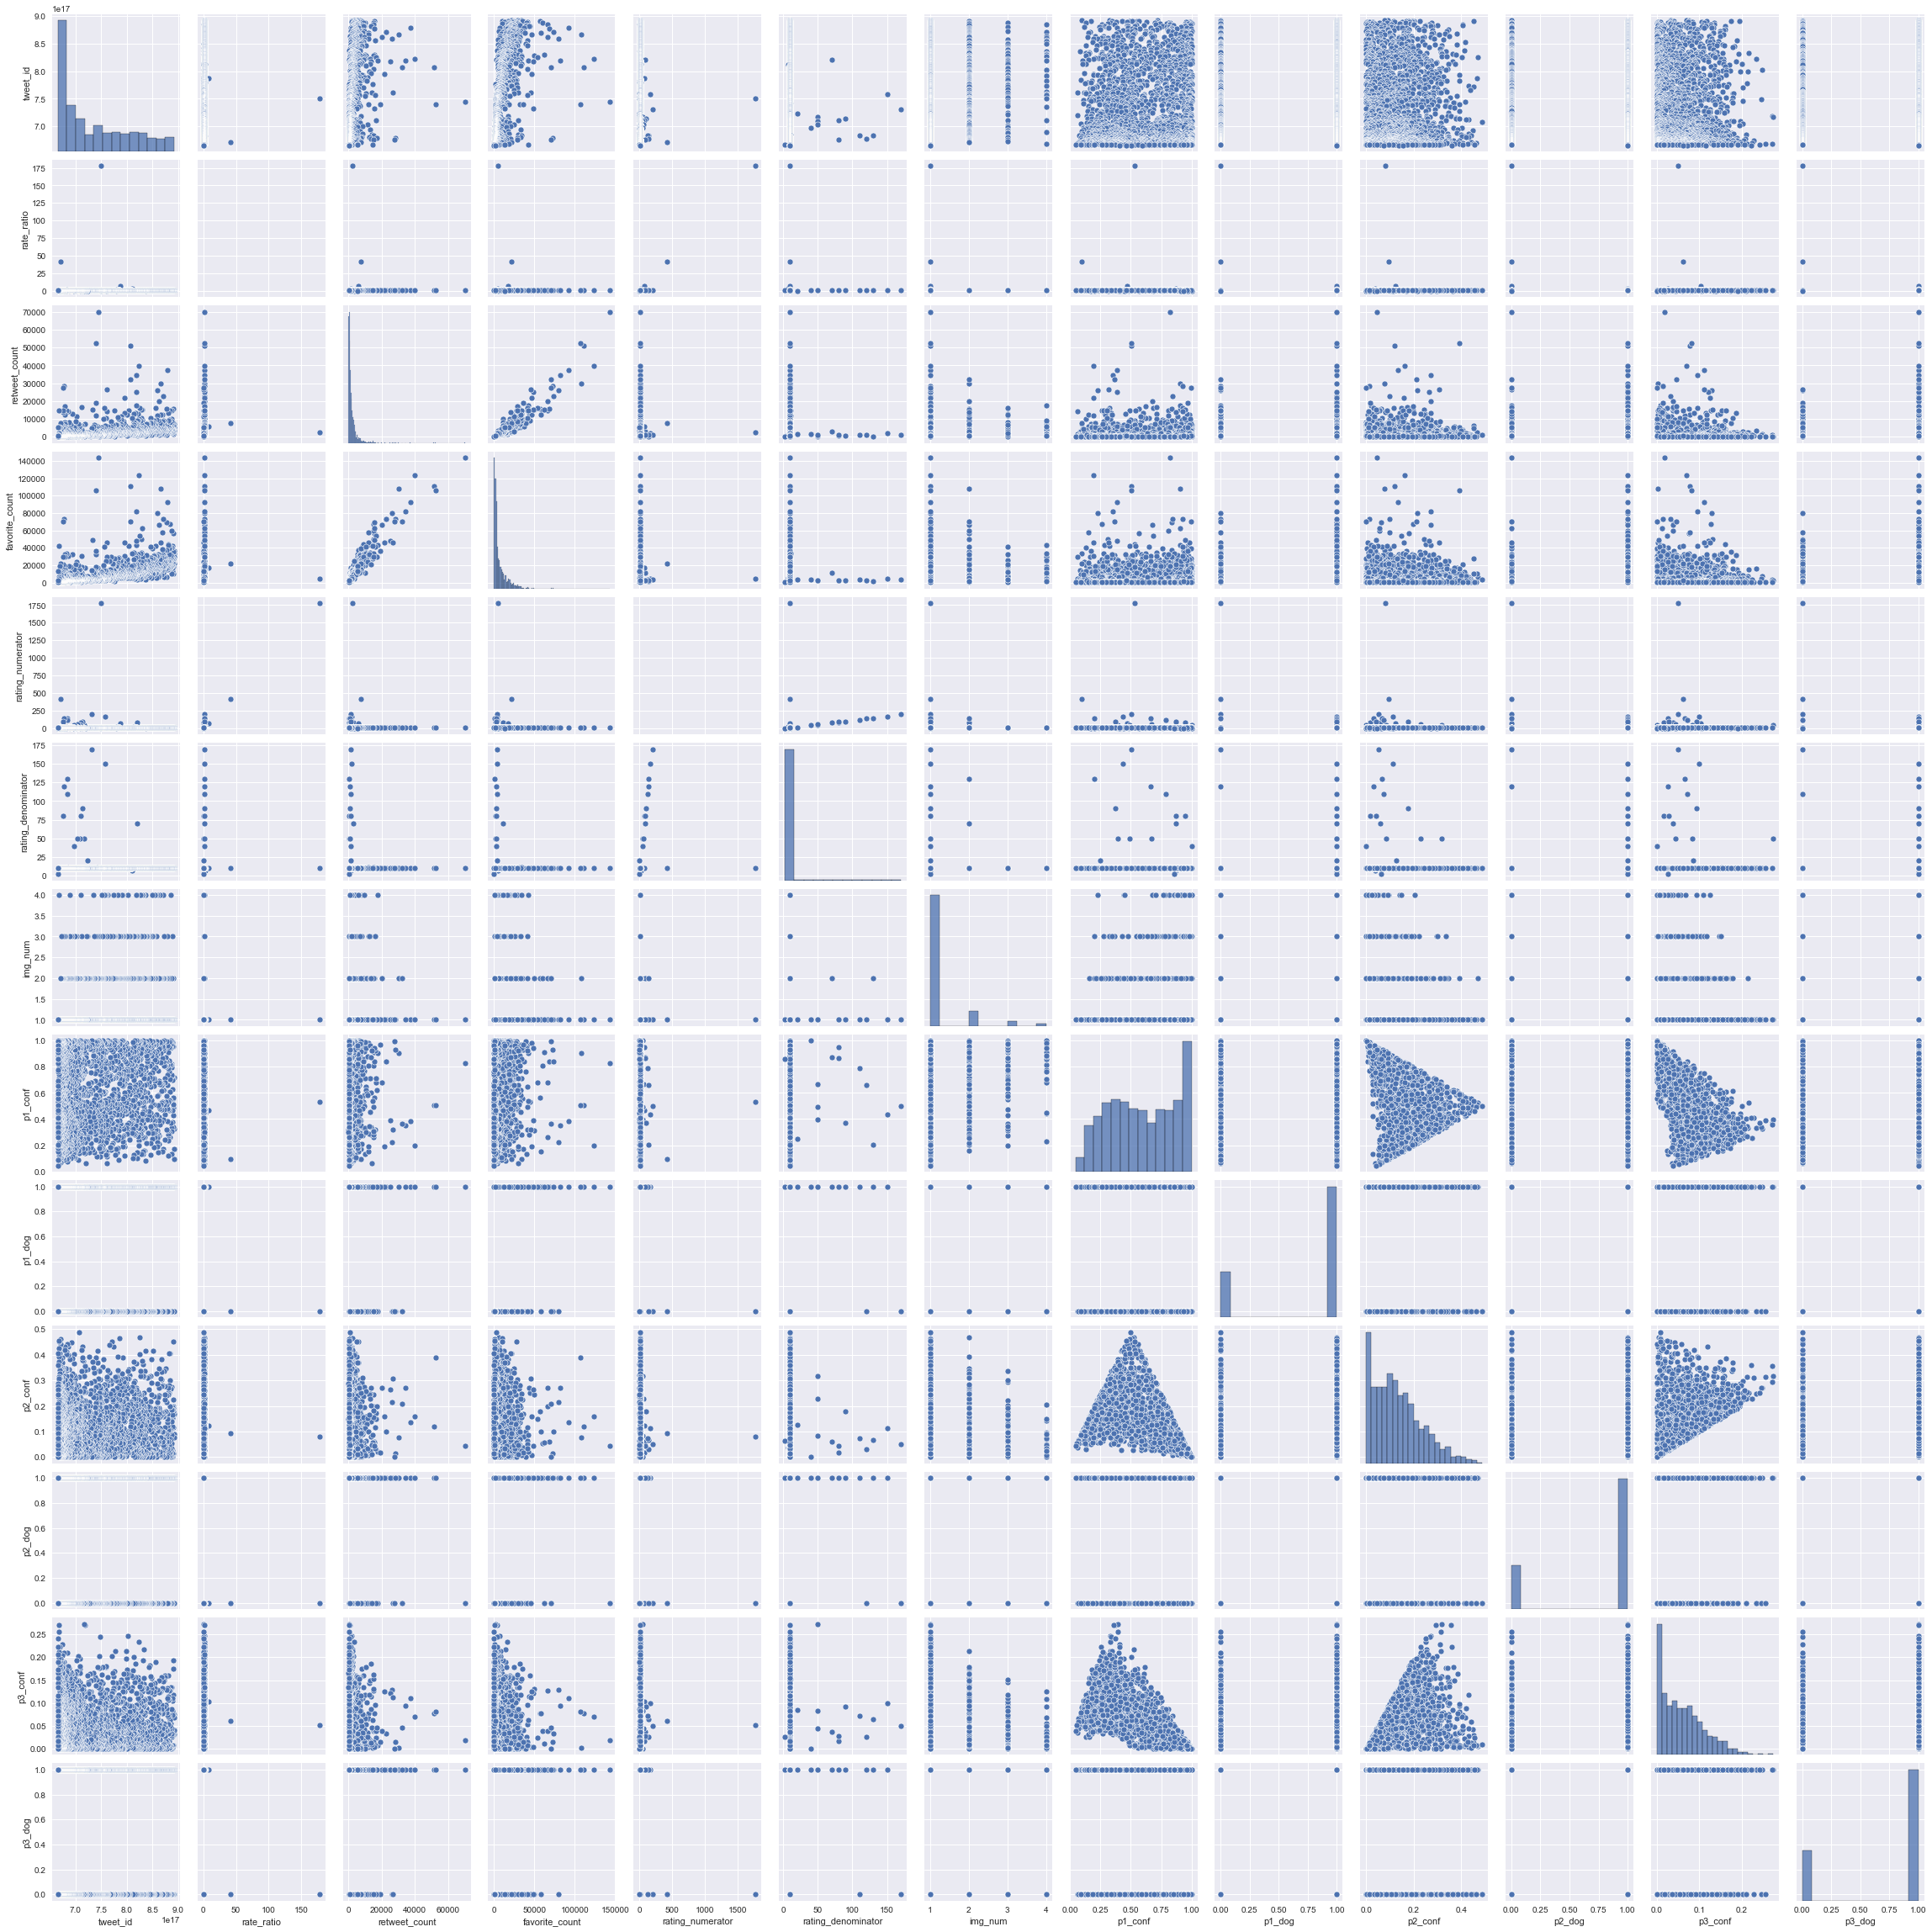

In [56]:
sns.pairplot(df);

### Favorite Count vs Retweet Count

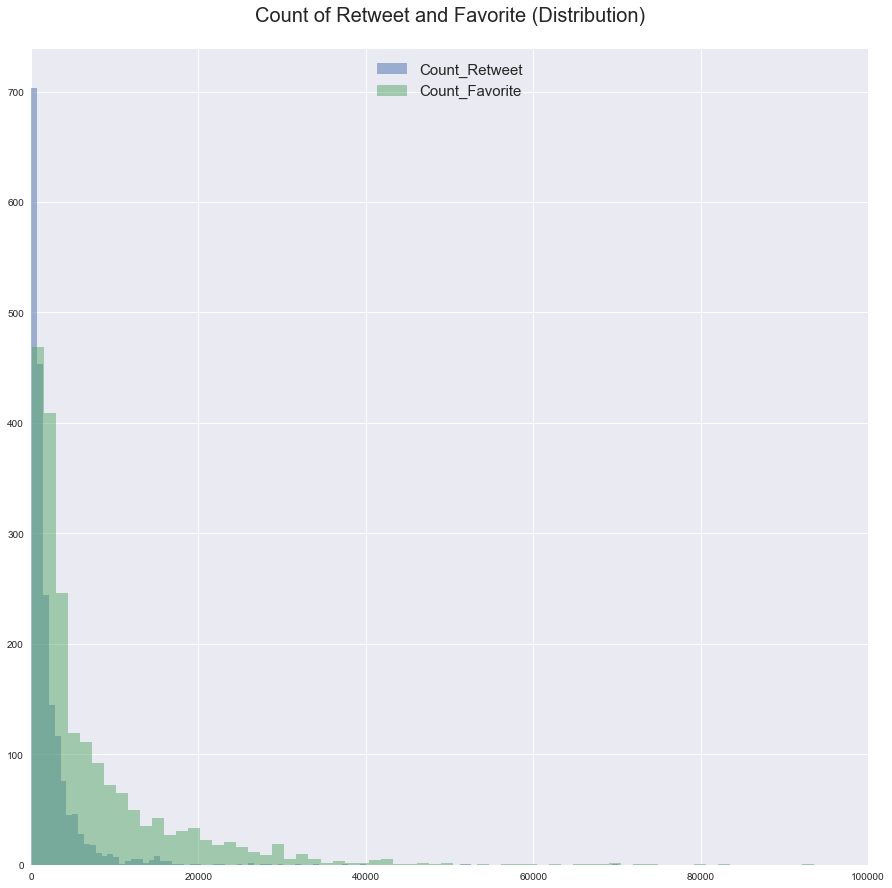

In [57]:
plt.figure(figsize=(15,15))
df.retweet_count.hist(alpha=0.5, bins=100, label='Count_Retweet')
df.favorite_count.hist(alpha=0.5, bins=100, label='Count_Favorite')
plt.title('Count of Retweet and Favorite (Distribution)\n', size = 20)
plt.legend(loc='upper center', fontsize = 15)
plt.xlim(0,100000)
plt.show()

In [58]:
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1983.000000,1983.000000
mean,2226.696420,7658.194655
std,3991.498942,11308.587162
min,11.000000,66.000000
25%,491.500000,1625.000000
50%,1070.000000,3433.000000
75%,2535.500000,9493.500000
max,70117.000000,143881.000000


Looking at the histogram above, we can see that the distribution of both retweets and favorites is considerably skewed to the right; nevertheless, the mean of favorite count (8394) is bigger than the mean of retweet count (2404.5). We also note that the greatest number of favorites obtained by a tweet was 144,219 while the maximum number of retweets received by a tweet was 70,325

### Common Dog Names

C:\Users\BCT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common Dog Names')

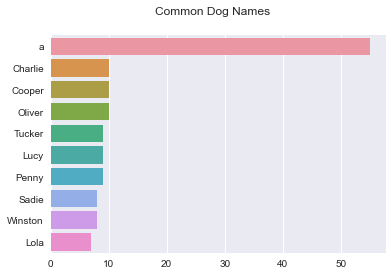

In [59]:
names = df['name'].value_counts()[:10]
sns.barplot(names.values, names.index)
plt.suptitle('Common Dog Names')

The most common dog names are Cooper, Oliver, and Charlie.

### Common Dog Types

C:\Users\BCT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common Dog Type')

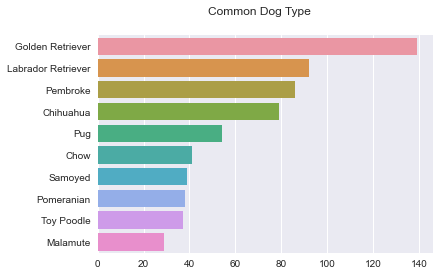

In [60]:
dog_type = df['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Common Dog Type')

### Heat Map for Correlations

The most common dog type are Golden Retriever, Labrador Retriever, Pembroke and Chihuahua

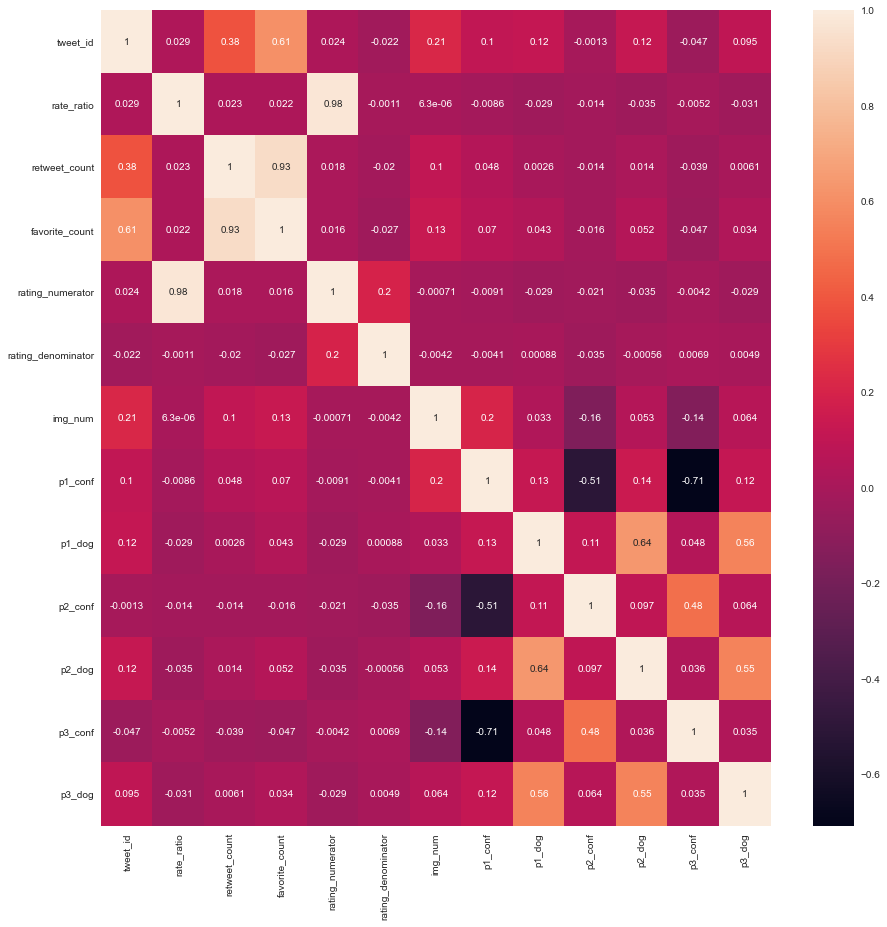

In [61]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:
<li>I observed a strong positive correlation of 0.93 between favorite count and retweet count which buttresses the above results.</li>
<li>I observed a relatively weak correlation of 0.48 between p3_conf and p1_conf which is interesting as different predictions will always have opposing confidence levels.</li>